In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

# Loading data and small data explore

In [2]:
df_ = pd.read_csv('data/top_20_CA_wildfires.csv')
df = df_.copy()

In [3]:
df.head()

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0


In [4]:
df.tail()

,fire_name,cause,month,year,county,acres,structures,deaths
15,Camp Fire,Powerlines,November,2018,Butte,153336,18804,85
16,Rough,Lightning,July,2015,Fresno,151623,4,0
17,Mcnally,Human Related,July,2002,Tulare,150696,17,0
18,Stanislaus Complex,Lightning,August,1987,Tuolumne,145980,28,1
19,Big Bar Complex,Lightning,August,1999,Trinity,140948,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fire_name   20 non-null     object
 1   cause       20 non-null     object
 2   month       20 non-null     object
 3   year        20 non-null     int64 
 4   county      20 non-null     object
 5   acres       20 non-null     int64 
 6   structures  20 non-null     int64 
 7   deaths      20 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ KB


In [6]:
df.describe()

,year,acres,structures,deaths
count,20.000000,20.000000,20.00000,20.000000
mean,2001.300000,210266.200000,1352.65000,6.150000
std,20.956346,75150.676664,4178.21521,18.918871
min,1932.000000,140948.000000,0.00000,0.000000
25%,2001.250000,158751.750000,0.75000,0.000000
50%,2007.500000,184952.000000,43.00000,0.500000
75%,2013.500000,244483.750000,552.25000,2.000000
max,2018.000000,459123.000000,18804.00000,85.000000


In [7]:
df['month'].unique()

array(['July', 'December', 'October', 'August', 'September', 'June',
       'November'], dtype=object)

In [8]:
df['month'].nunique()

7

In [9]:
df['cause'].unique()

array(['Under Investigation', 'Powerlines', 'Human Related', 'Lightning',
       'Undetermined'], dtype=object)

# Data visualization

In [10]:
'''
Helper functions
'''
def create_df(data, columns):
    return pd.DataFrame(data=data, columns=columns)

def barplot(x, y, data, columns):
    plt.figure(figsize=(15, 7))
    return sns.barplot(x=x, y=y, data=create_df(data, columns))

def lineplot(x, y, data, columns):
    plt.figure(figsize=(15, 7))
    return sns.lineplot(x=x, y=y, data=create_df(data, columns))

In [11]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
per_month = np.zeros((len(months)))

for i, month in enumerate(months):
    per_month[i] = df.loc[df['month'] == month].shape[0]

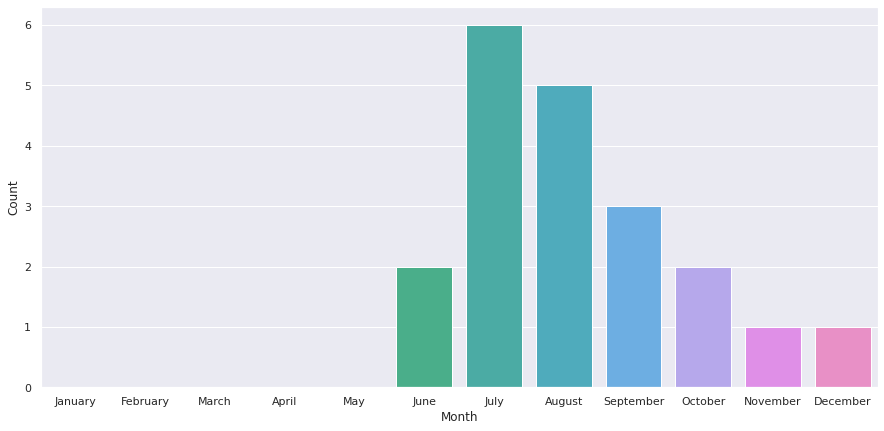

In [12]:
barplot(x='Month', y='Count', data=np.c_[months, per_month], columns=['Month', 'Count'])

In [13]:
years = df['year'].unique() # get all unique years
'''
We will use bubble sort because it is easey to implement and in our small amount of data O(n^2) is not big
'''
for i in range(years.shape[0]):
    for j in range(years.shape[0] - 1):
        if years[j] > years[j+1]:
            years[j], years[j+1] = years[j+1], years[j]

In [14]:
per_year = np.zeros((years.shape[0]))

for i, year in enumerate(years):
    per_year[i] = df.loc[df['year'] == year].shape[0]

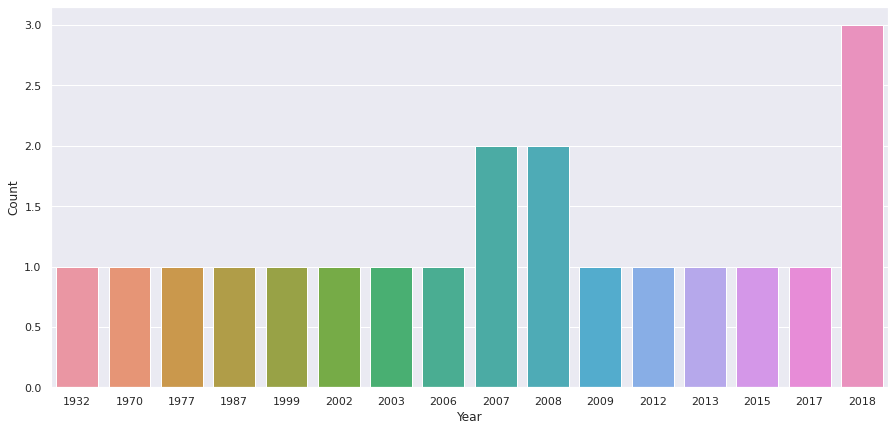

In [15]:
barplot(x='Year', y='Count', data=np.c_[years.astype(str), per_year], columns=['Year', 'Count'])

In [16]:
total_per_year = np.zeros((years.shape[0]))
total_per_year[0] = per_year[0]

for i in range(1, per_year.shape[0]):
    total_per_year[i] = total_per_year[i - 1] + per_year[i]

In [17]:
df['year'].min(), df['year'].max()

(1932, 2018)

[[<matplotlib.axis.XTick at 0x7f2a37051ed0>,

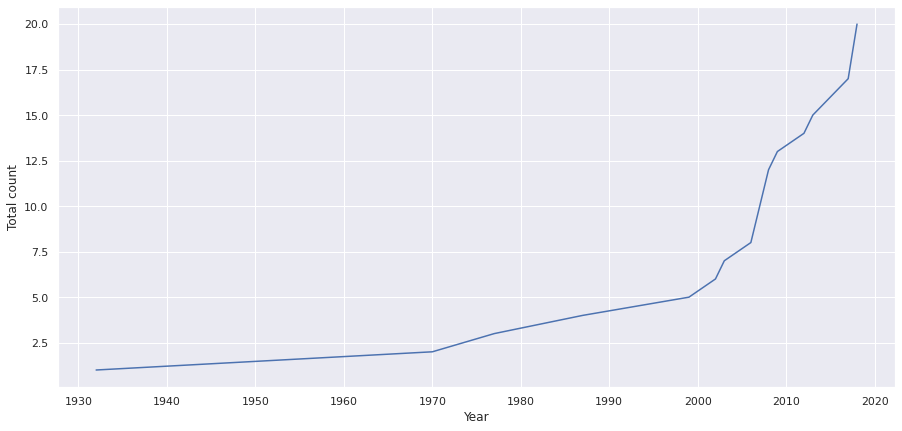

In [18]:
lineplot(x='Year', y='Total count', data=np.c_[years, total_per_year], columns=['Year', 'Total count']).set(xticks=np.arange(1930, 2030, 10))

In [19]:
causes = df['cause'].unique()
deaths_per_cause = np.zeros(causes.shape)

for i, cause in enumerate(causes):
    deaths_per_cause[i] = df[df['cause'] == cause]['deaths'].values.sum() * 100 / df['deaths'].values.sum()

[Text(0, 0.5, 'Deaths [%]')]

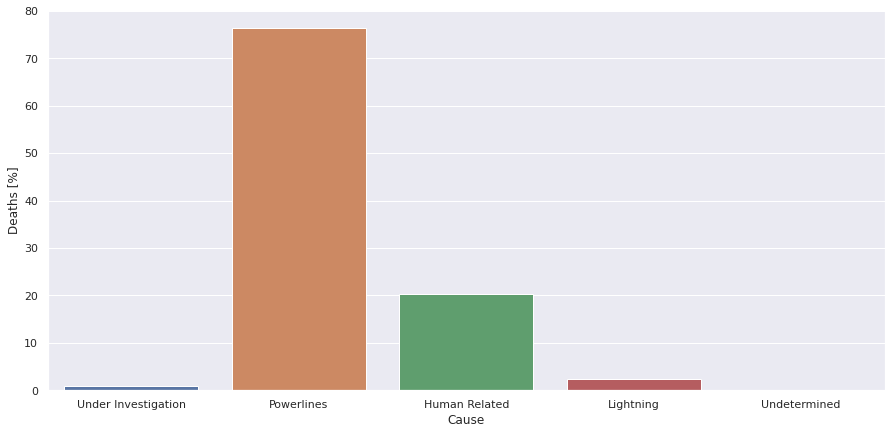

In [20]:
barplot(x='Cause', y='Deaths', data=np.c_[causes, deaths_per_cause], columns=['Cause', 'Deaths']).set(ylabel='Deaths [%]')

In [21]:
acres_burned_by_cause = np.zeros(causes.shape)

for i, cause in enumerate(causes):
    acres_burned_by_cause[i] = df.loc[df['cause'] == cause]['acres'].values.sum()

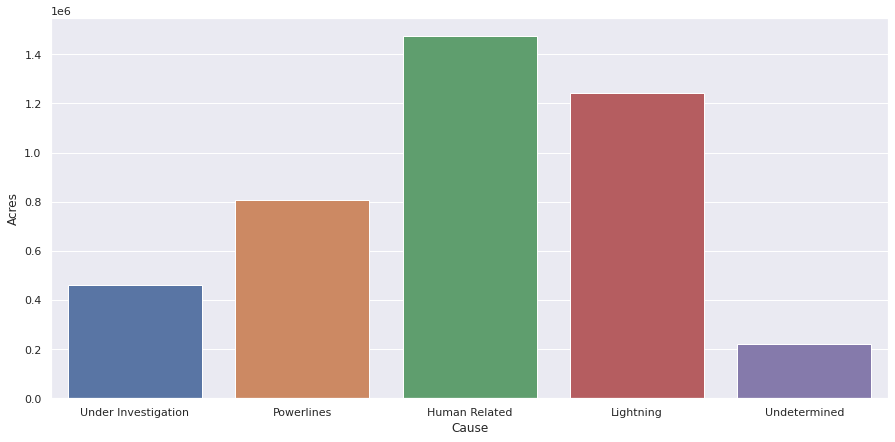

In [22]:
barplot(x='Cause', y='Acres', data=np.c_[causes, acres_burned_by_cause], columns=['Cause', 'Acres'])

In [23]:
acres_per_year = np.zeros(years.shape)

for i, year in enumerate(years):
    acres_per_year[i] = df.loc[df['year'] == year]['acres'].values.sum()

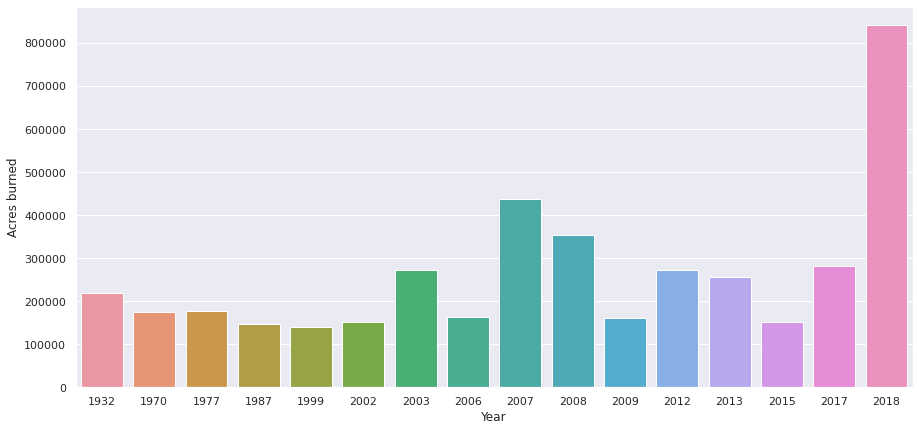

In [24]:
barplot(x='Year', y='Acres burned', data=np.c_[years.astype(str), acres_per_year], columns=['Year', 'Acres burned'])

In [25]:
total_acres = np.zeros(years.shape)
total_acres[0] = acres_per_year[0]

for i in range(1, acres_per_year.shape[0]):
    total_acres[i] = total_acres[i-1] + acres_per_year[i]

[[<matplotlib.axis.XTick at 0x7f2a3712ae10>,

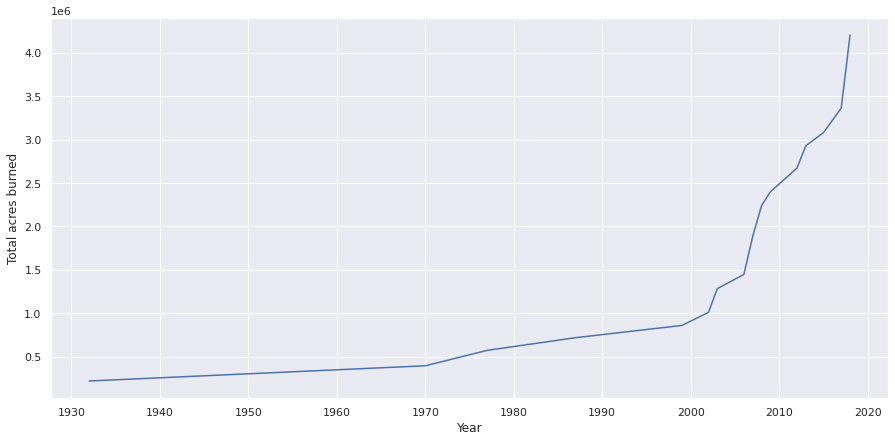

In [26]:
lineplot(x='Year', y='Total acres burned', data=np.c_[years, total_acres], columns=['Year', 'Total acres burned']).set(xticks=np.arange(1930, 2030, 10))